In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
L, K = 1, 1

# Finite Difference Solver Function
def finite_difference_solution(N, C, T_final):
    dx = L / (N - 1)
    dt = C * dx**2 / K
    Nt = int(T_final / dt + 0.5)
    
    # Grid
    x = np.linspace(0, L, N)
    t = np.linspace(0, T_final, Nt)
    
    # Initialize theta
    theta_mesh = np.zeros((Nt, N))
    theta_mesh[0, :] = np.sin(np.pi * x)  # Initial condition
    
    # Time-stepping loop
    for j in range(Nt - 1):
        for i in range(1, N - 1):
            theta_mesh[j + 1, i] = theta_mesh[j, i] + C * (theta_mesh[j, i + 1] - 2 * theta_mesh[j, i] + theta_mesh[j, i - 1])

    return x, t, theta_mesh, dx, dt

In [22]:
x, t, theta_mesh, dx, dt = finite_difference_solution(10,2/3,1)

In [24]:
# Analytical Solution for Comparison
def analytical_solution(x, t, K):
    return np.sin(np.pi * x) * np.exp(-K * np.pi**2 * t)

In [26]:
# Extracting Specific
t_values = [0.25, 0.75]
selected_indices = [int(t_val / dt) for t_val in t_values]
print(selected_indices)

[30, 91]


In [28]:
# Step 8: Print table of results
for idx, t_val in zip(selected_indices, t_values):
    num_sol = theta_mesh[idx, :]
    ana_sol = analytical_solution(x, t_val, K)
    error = np.abs(num_sol - ana_sol)

    df = pd.DataFrame({
        "x": x,
        "Numerical Solution": num_sol,
        "Analytical Solution": ana_sol,
        "Error": error
    })

    print(f"\nResults at t = {t_val:.2f}")
    print(df.to_string(index=False))


Results at t = 0.25
       x  Numerical Solution  Analytical Solution        Error
0.000000            0.000000         0.000000e+00 0.000000e+00
0.111111            0.027662         2.900501e-02 1.343163e-03
0.222222            0.051987         5.451159e-02 2.524320e-03
0.333333            0.070042         7.344326e-02 3.401007e-03
0.444444            0.079649         8.351659e-02 3.867482e-03
0.555556            0.079649         8.351659e-02 3.867482e-03
0.666667            0.070042         7.344326e-02 3.401007e-03
0.777778            0.051987         5.451159e-02 2.524320e-03
0.888889            0.027662         2.900501e-02 1.343163e-03
1.000000            0.000000         1.038561e-17 1.038561e-17

Results at t = 0.75
       x  Numerical Solution  Analytical Solution        Error
0.000000            0.000000         0.000000e+00 0.000000e+00
0.111111           -4.396531         2.086006e-04 4.396739e+00
0.222222            8.263394         3.920410e-04 8.263002e+00
0.333333     

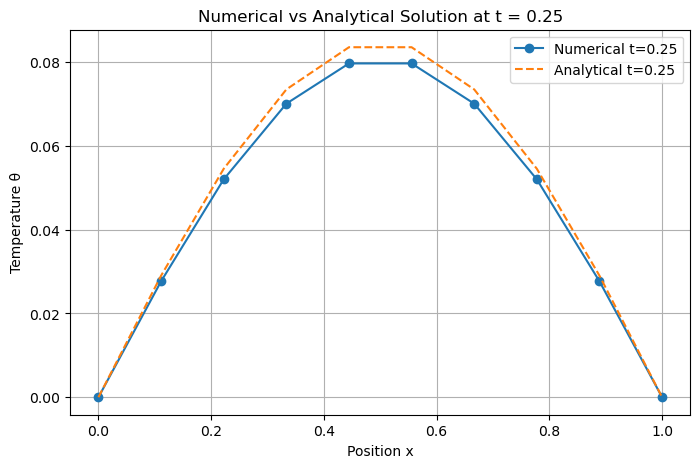

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(x, theta_mesh[selected_indices[0], :], 'o-', label=f"Numerical t=0.25")
plt.plot(x, analytical_solution(x, 0.25, K), '--', label=f"Analytical t=0.25")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.25")
plt.grid()
plt.show()

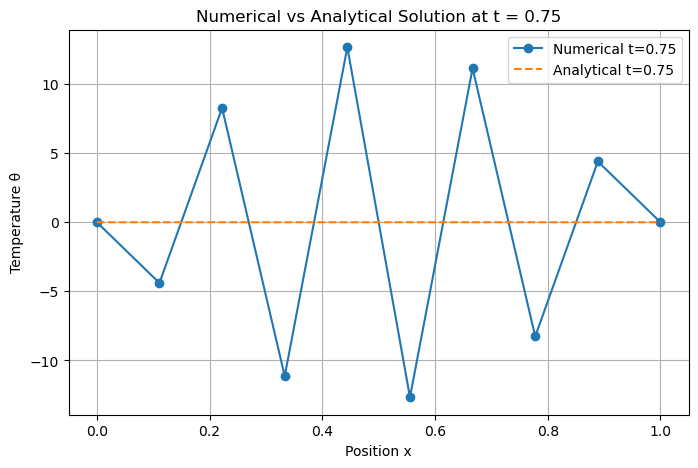

In [8]:
# Plot for t = 0.75
plt.figure(figsize=(8, 5))
plt.plot(x, theta_mesh[selected_indices[1], :], 'o-', label=f"Numerical t=0.75")
plt.plot(x, analytical_solution(x, 0.75, K), '--', label=f"Analytical t=0.75")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.75")
plt.grid()
plt.show()

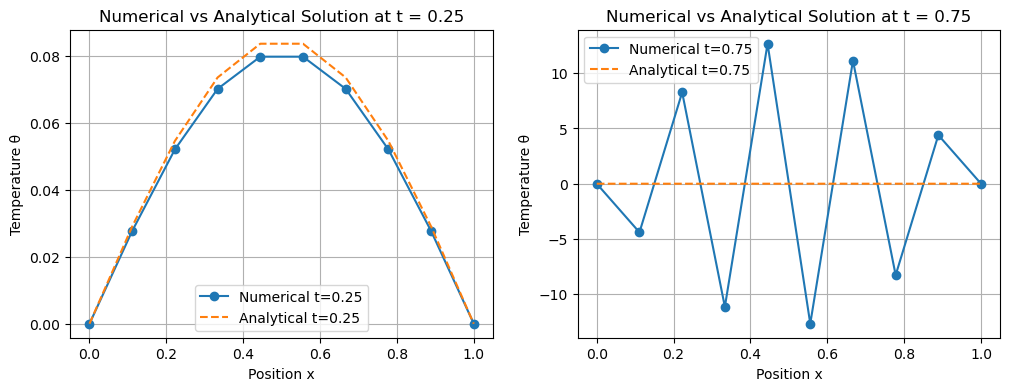

In [9]:
plt.figure(figsize = (12,4))
plt.tight_layout()
plt.subplot(121)
plt.plot(x, theta_mesh[selected_indices[0], :], 'o-', label=f"Numerical t=0.25")
plt.plot(x, analytical_solution(x, 0.25, K), '--', label=f"Analytical t=0.25")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.25")
plt.grid()

plt.subplot(122)
plt.plot(x, theta_mesh[selected_indices[1], :], 'o-', label=f"Numerical t=0.75")
plt.plot(x, analytical_solution(x, 0.75, K), '--', label=f"Analytical t=0.75")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.75")
plt.grid()

plt.show()

## Error Analysis

In [11]:
# Common Parameters
L, K, T_final = 1.0, 1.0, 1  # Domain length, diffusion coefficient, final time
t_val = 0.5  # Time point for error analysis

In [30]:
# RMS Error Calculation (Integral of Squared Error)
def compute_rms_error(num_sol, ana_sol, x):
    error_sq = (num_sol - ana_sol) ** 2
    integral_error_sq = np.trapz(error_sq, x)  # Integrate over x
    return np.sqrt(integral_error_sq)  # Square root of integral

In [13]:
# Error Analysis for Different N and C
N_values = np.arange(10,100,10)  # Grid resolutions
C_values = np.arange(0.05,0.5,0.01)  # Stability coefficients

rms_errors_N = []  # List for errors varying N
rms_errors_C = []  # List for errors varying C

In [14]:
# Compute Error for Different N
C_fixed = 1/3  # Fixed C for N analysis
for N in N_values:
    x, t, theta_mesh, dx, dt = finite_difference_solution(N, C_fixed, T_final)
    idx = int(t_val / (C_fixed * (L / (N - 1))**2 / K))  # Time index
    num_sol = theta_mesh[idx, :]
    ana_sol = analytical_solution(x, t_val, K)
    rms_errors_N.append(compute_rms_error(num_sol, ana_sol, x))  # Append directly

In [ ]:
# Compute Error for Different C
N_fixed =200  # Fixed N for C analysis
for C in C_values:
    x, t, theta_mesh, dx, dt = finite_difference_solution(N_fixed, C, T_final)
    idx = int(t_val / (C * (L / (N_fixed - 1))**2 / K))  # Time index
    num_sol = theta_mesh[idx, :]
    ana_sol = analytical_solution(x, t_val, K)
    rms_errors_C.append(compute_rms_error(num_sol, ana_sol, x))  # Append directly

In [ ]:
# Print Error Table
print(f"\nRMS Error for Different N (C = {C_fixed:.2f}):")
df_N = pd.DataFrame(rms_errors_N, index=N_values)
df_N.index.name = "N"
print(df_N.to_string())

print(f"\nRMS Error for Different C (N = {N_fixed}):")
df_C = pd.DataFrame(rms_errors_C, index=C_values)
df_C.index.name = "C"
print(df_C.to_string())

In [ ]:
# Plot RMS Error vs. N
plt.figure(figsize=(8, 6))
plt.plot(N_values, rms_errors_N, 'o-', label=f"t={t_val:.2f}")
plt.xlabel('Number of Grid Points (N)')
plt.ylabel('RMS Error')
plt.legend()
plt.title(f'RMS Error vs N at t={t_val:.2f}, C = {C_fixed:.2f}')
plt.grid()
plt.show()

In [ ]:
# Plot RMS Error vs. C
plt.figure(figsize=(8, 6))
plt.plot(C_values, rms_errors_C, 'o-', label=f"t={t_val:.2f}")
plt.xlabel('Stability Coefficient (C)')
plt.ylabel('RMS Error')
plt.legend()
plt.title(f'RMS Error vs C at t={t_val:.2f}, N ={N_fixed}')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(N_values, rms_errors_N, 'o-', label=f"t={t_val:.2f}")
plt.xlabel('Number of Grid Points (N)')
plt.ylabel('RMS Error')
plt.legend()
plt.title(f'RMS Error vs N at t={t_val:.2f}, C = {C_fixed:.2f}')
plt.grid()

plt.subplot(122)
plt.plot(C_values, rms_errors_C, 'o-', label=f"t={t_val:.2f}")
plt.xlabel('Stability Coefficient (C)')
plt.ylabel('RMS Error')
plt.legend()
plt.title(f'RMS Error vs C at t={t_val:.2f}, N ={N_fixed}')
plt.grid()

plt.show()

## Von Neumann Stability Analysis

In [ ]:
# Parameters
L, K, T_final = 1.0, 1.0, 1
N = [5, 10, 20, 30, 40, 50]  # Different spatial resolutions  # Different Courant numbers
C_values = np.linspace(0,1,100)

In [ ]:
def von_neumann_stability(C):
    k_values = np.linspace(0, np.pi, 100)  # Wave numbers
    amplification_factors = np.abs(1 - 4 * C * np.sin(k_values / 2) ** 2)
    stable = np.all(amplification_factors <= 1)  # Stability criterion
    return stable

In [ ]:
# Stability Check for a range of C values
stability_results = {C: von_neumann_stability(C) for C in C_values}
print("\nVon-Neumann Stability Analysis:")
for C, is_stable in stability_results.items():
    print(f"Courant Number C = {C:.2f}: {'Stable' if is_stable else 'Unstable'}")

# Identifying the first unstable C
unstable_C = next((C for C, stable in stability_results.items() if not stable), None)
if unstable_C:
    print(f"\nThe system becomes unstable at Courant number C = {unstable_C:.2f}")

## Crank-Nicolson Scheme

In [32]:
# Constants
L, K = 1, 1  

# Crank-Nicholson Solver Function
def crank_nicholson_solution(N, C, T_final):
    dx = L / (N - 1)
    dt = C * dx**2 / K
    Nt = int(T_final / dt + 0.5) 
    
    x = np.linspace(0, L, N)
    t = np.linspace(0, T_final, Nt)
    
    mesh = np.zeros((Nt, N))
    mesh[0, :] = np.sin(np.pi * x)  # Initial condition
    
    # Construct A and B matrices
    N_int = N - 2 
    D2 = np.diag([-2] * N_int) + np.diag([1] * (N_int - 1), -1) + np.diag([1] * (N_int - 1), 1)

    A = np.eye(N_int) - (C / 2) * D2
    B = np.eye(N_int) + (C / 2) * D2

    # Time-stepping loop
    for j in range(Nt - 1):
        b = np.dot(B, mesh[j, 1:-1])
        b[0] += (C / 2) * mesh[j, 0]  
        b[-1] += (C / 2) * mesh[j, -1]  
        solution = np.linalg.solve(A, b)
        mesh[j + 1, 1:-1] = solution
        mesh[j + 1, 0] = 0  # Left boundary condition
        mesh[j + 1, -1] = 0  # Right boundary condition

    return x, t, mesh, dx, dt

In [34]:
x, t, mesh, dx, dt = crank_nicholson_solution(10, 2/3,1)

In [36]:
t_values = [0.25, 0.75]
selected_indices = [int(t_val / dt) for t_val in t_values]

In [38]:
# Step 8: Print table of results
for idx, t_val in zip(selected_indices, t_values):
    num_sol = mesh[idx, :]
    ana_sol = analytical_solution(x, t_val, K)
    error = np.abs(num_sol - ana_sol)

    df = pd.DataFrame({
        "x": x,
        "Numerical Solution": num_sol,
        "Analytical Solution": ana_sol,
        "Error": error
    })

    print(f"\nResults at t = {t_val:.2f}")
    print(df.to_string(index=False))


Results at t = 0.25
       x  Numerical Solution  Analytical Solution        Error
0.000000            0.000000         0.000000e+00 0.000000e+00
0.111111            0.030608         2.900501e-02 1.603359e-03
0.222222            0.057525         5.451159e-02 3.013329e-03
0.333333            0.077503         7.344326e-02 4.059847e-03
0.444444            0.088133         8.351659e-02 4.616688e-03
0.555556            0.088133         8.351659e-02 4.616688e-03
0.666667            0.077503         7.344326e-02 4.059847e-03
0.777778            0.057525         5.451159e-02 3.013329e-03
0.888889            0.030608         2.900501e-02 1.603359e-03
1.000000            0.000000         1.038561e-17 1.038561e-17

Results at t = 0.75
       x  Numerical Solution  Analytical Solution        Error
0.000000            0.000000         0.000000e+00 0.000000e+00
0.111111            0.000226         2.086006e-04 1.759111e-05
0.222222            0.000425         3.920410e-04 3.306047e-05
0.333333     

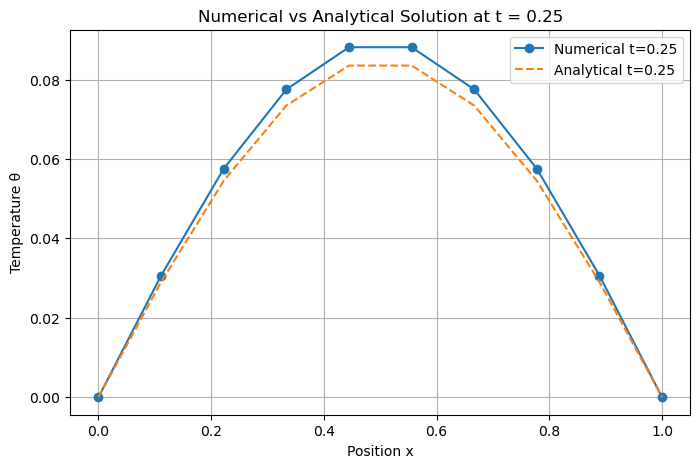

In [40]:
# Plot for t = 0.25
plt.figure(figsize=(8, 5))
plt.plot(x, mesh[selected_indices[0], :], 'o-', label=f"Numerical t=0.25")
plt.plot(x, analytical_solution(x, 0.25, K), '--', label=f"Analytical t=0.25")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.25")
plt.grid()
plt.show()

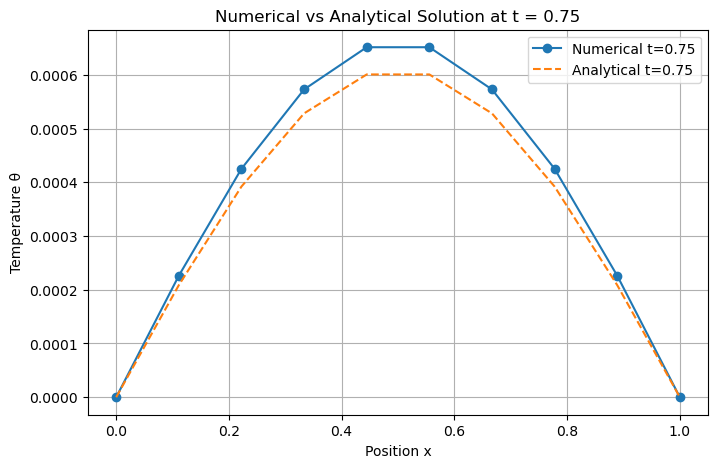

In [41]:
# Plot for t = 0.75
plt.figure(figsize=(8, 5))
plt.plot(x, mesh[selected_indices[1], :], 'o-', label=f"Numerical t=0.75")
plt.plot(x, analytical_solution(x, 0.75, K), '--', label=f"Analytical t=0.75")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.75")
plt.grid()
plt.show()

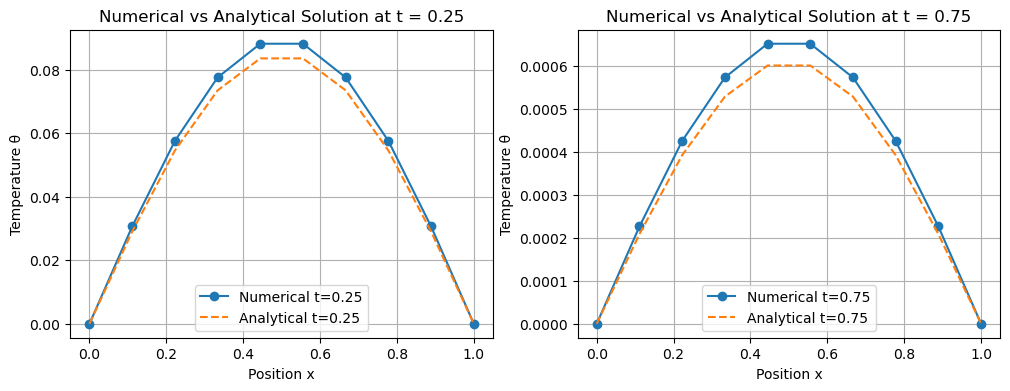

In [43]:
plt.figure(figsize=(12, 4))
plt.tight_layout()

plt.subplot(121)
plt.plot(x, mesh[selected_indices[0], :], 'o-', label=f"Numerical t=0.25")
plt.plot(x, analytical_solution(x, 0.25, K), '--', label=f"Analytical t=0.25")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.25")
plt.grid()

plt.subplot(122)
plt.plot(x, mesh[selected_indices[1], :], 'o-', label=f"Numerical t=0.75")
plt.plot(x, analytical_solution(x, 0.75, K), '--', label=f"Analytical t=0.75")
plt.xlabel("Position x")
plt.ylabel("Temperature θ")
plt.legend()
plt.title("Numerical vs Analytical Solution at t = 0.75")
plt.grid()

plt.show()

## Error Analysis

In [46]:
# Check Convergence (E vs C^2)
C_values = np.arange(0.05, 200 ,0.5)  # Stability coefficients
errors = []
t_val = 2

for C in C_values:
    N = 120
    T_final = 5
    x, t, mesh, dx, dt = crank_nicholson_solution(N, C, T_final)
    idx = int(t_val / (C * (L / (N - 1))**2 / K))  # Time index
    num_sol = mesh[idx, :]
    # Compute analytical solution at final time
    ana_sol = analytical_solution(x, 5,1)
    
    # Compute error at final time step
    E = compute_rms_error(mesh[-1, :], ana_sol, x)
    errors.append(E)

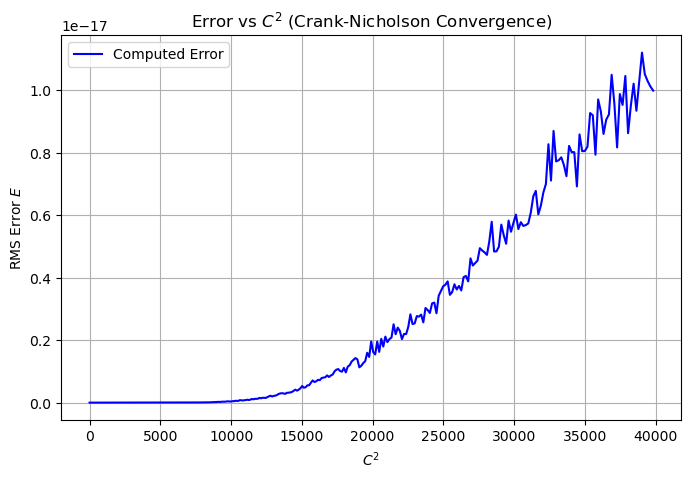

In [53]:
# Plot Error vs C^2
C_squared = np.array(C_values**2)

plt.figure(figsize=(8, 5))
plt.plot(C_squared, errors, 'b-', label="Computed Error")
plt.xlabel("$C^2$")
plt.ylabel("RMS Error $E$")
plt.title("Error vs $C^2$ (Crank-Nicholson Convergence)")
plt.legend()
plt.grid()
plt.show()